<a href="https://colab.research.google.com/github/jan-de-trop/Billboard-Top-100-Singles/blob/main/EDA%2C_Viz_and_Billboard_Magazine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Visualization 

## Importing the libraries

In [1]:
#Import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
import pickle
from bs4 import BeautifulSoup
import requests
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Loading the Dataframes

In [3]:
flatframe = pd.read_pickle('/content/gdrive/MyDrive/flatframedf')
flatframe.head()

,year,band_singer,url,song,songurl,ranking
0,1992,Boyz II Men,/wiki/Boyz_II_Men,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),1
1,1993,Whitney Houston,/wiki/Whitney_Houston,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,1
2,1994,Ace of Base,/wiki/Ace_of_Base,The Sign (song),/wiki/The_Sign_(song),1
3,1995,Coolio,/wiki/Coolio,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1
4,1995,L.V. (singer),/wiki/L.V._(singer),Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1


In [4]:
largedf = pd.read_pickle('/content/gdrive/MyDrive/largedf')
largedf.head()

,year,band_singer,url,song,songurl,ranking,genres,born,ya,#Musical_style,/w/index.php?title=Soul_rock_(music)&action=edit&redlink=1,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_contemporary,/wiki/Afrobeats,/wiki/Alternative_R%26B,/wiki/Alternative_Rock,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_folk,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_music,/wiki/Alternative_pop,/wiki/Ambient_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_rock,/wiki/Atlantic_Records,/wiki/Avant-funk,/wiki/Avant-garde_music,/wiki/Avant-pop,/wiki/Bachata_(music),/wiki/Baroque_pop,/wiki/Bass_music,/wiki/Bassline_(music_genre),/wiki/Bedroom_pop,/wiki/Bhangra_(music),/wiki/Big_room_house,/wiki/Blue-eyed_soul,/wiki/Bluegrass_music,/wiki/Blues_music,/wiki/Blues_rock,/wiki/Breakbeat,/wiki/British_hip_hop,...,/wiki/Smooth_jazz,/wiki/Snap_music,/wiki/Soca_music,/wiki/Soft_rock,/wiki/Sophisti-pop,/wiki/Soul_music,/wiki/Soundcloud_rap,/wiki/Southern_hip_hop,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_rock,/wiki/Speed_metal,/wiki/Spoken_word,/wiki/Surf_music,/wiki/Swing_music,/wiki/Synth-pop,/wiki/Synth-rock,/wiki/Synthpop,/wiki/Synthwave_(2000s_genre),/wiki/Tech_house,/wiki/Techno,/wiki/Teen_pop,/wiki/Thrash_metal,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trap_music_(EDM),/wiki/Trap_music_(hip_hop),/wiki/Trip_hop,/wiki/Trop_rock,/wiki/Tropical_house,/wiki/Tropical_music,/wiki/UK_bass,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_pop,/wiki/Urbano_music,/wiki/Video_game,/wiki/Wagnerian_rock,/wiki/West_coast_hip_hop,/wiki/Western_swing,/wiki/Working_on_Dying#Tread_style,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,NA
0,1992,Boyz II Men,/wiki/Boyz_II_Men,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),1,"['/wiki/Contemporary_R%26B_music', '/wiki/New_...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1992,Boyz II Men,/wiki/Boyz_II_Men,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,37,"['/wiki/Contemporary_R%26B_music', '/wiki/New_...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1992,Boyz II Men,/wiki/Boyz_II_Men,Uhh Ahh,/wiki/Uhh_Ahh,84,"['/wiki/Contemporary_R%26B_music', '/wiki/New_...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1993,Boyz II Men,/wiki/Boyz_II_Men,In the Still of the Night (1956 song),/wiki/In_the_Still_of_the_Night_(1956_song)#Bo...,12,"['/wiki/Contemporary_R%26B_music', '/wiki/New_...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1994,Boyz II Men,/wiki/Boyz_II_Men,I'll Make Love to You,/wiki/I%27ll_Make_Love_to_You,3,"['/wiki/Contemporary_R%26B_music', '/wiki/New_...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

## What has been the trajectory of various genres in the popular zeitgeist?

In [23]:
genrefrac = largedf.mean(axis=0)*100
genrefrac = genrefrac[2:]
sortedgenre=genrefrac.sort_values(ascending=False)
topgenre=sortedgenre[:30]

In [24]:
g = topgenre.reset_index()
g['Genres']=g['index'].apply(lambda x: x.split('/')[-1].replace('_', ' ').replace('%26','&')) # Pre-processing to extract only the genre name
del g['index']
g=g.rename(columns={0:'% of Songs'})
g=g.set_index('Genres')

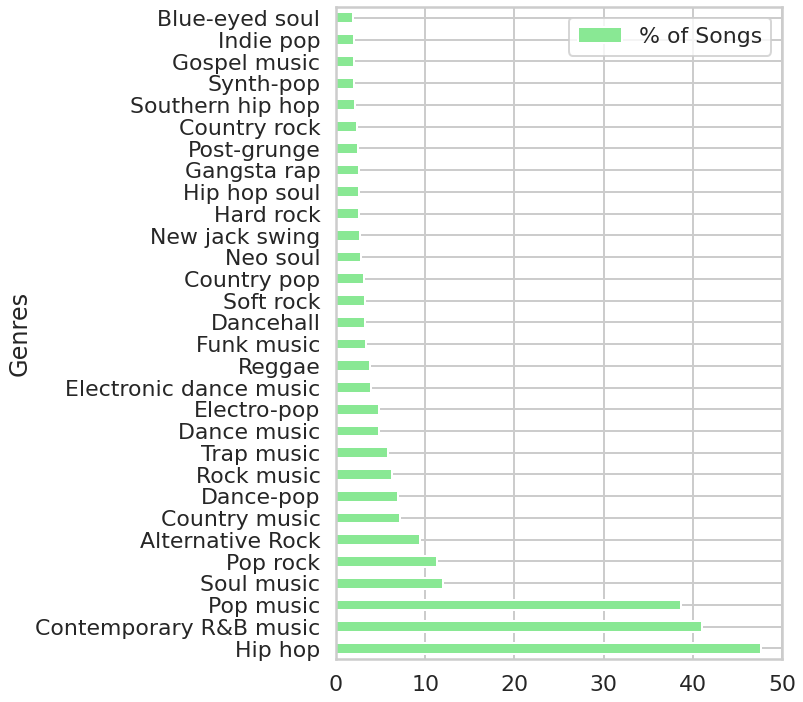

In [30]:
g.plot(kind="barh",figsize=(8, 12),color='#89E894')

Now that we have the top 30 genres, we can understand the trajectory of these various genres with time.

In [10]:
subdf=pd.DataFrame()
genregby={}
genreinfo={}
for g in genpop.columns:
  subdf=largedf[largedf[g]==1]
  subdf=subdf[['ranking','year']]
  genregby[g]=subdf
  subdf=subdf.groupby('year')
  genreinfo[g]={'meanseries':subdf['ranking'].agg([np.mean]),'rankingseries':subdf['ranking'],'stdseries':subdf['ranking'].agg([np.std])}

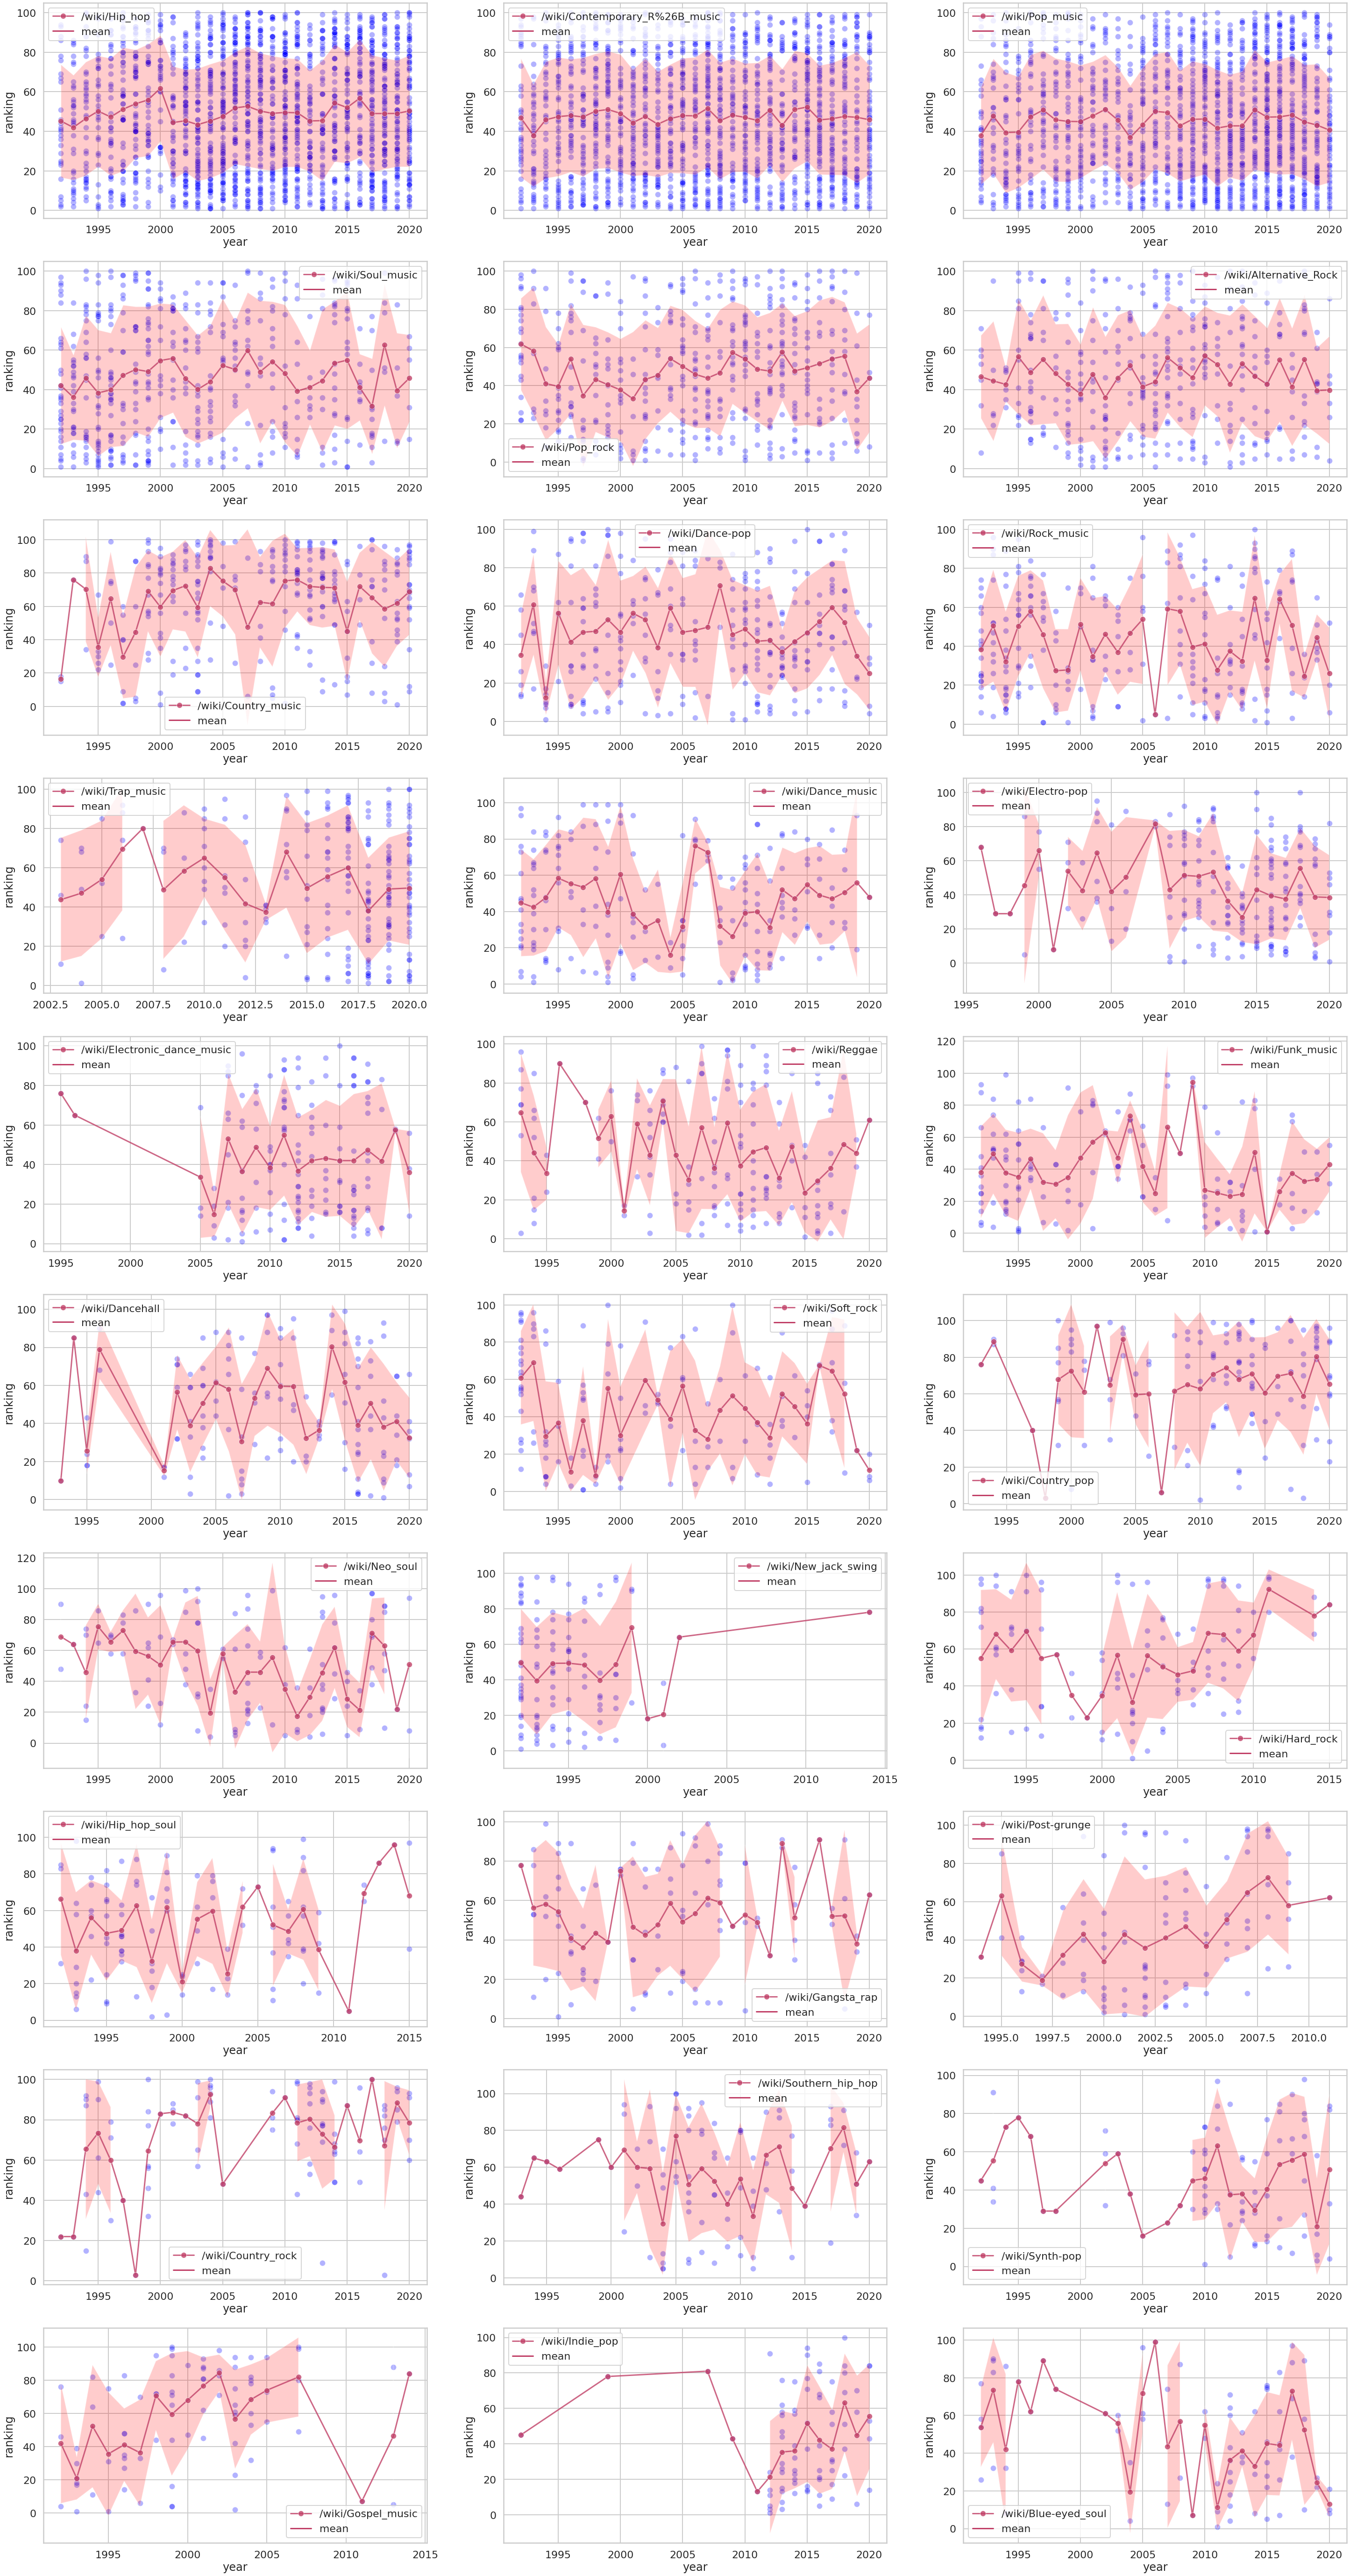

In [11]:
import math
fig,axes=plt.subplots(nrows=10,ncols=3,figsize=(50,100))
for ax,genre in zip(axes.ravel(),genpop.columns):
  ind=[]
  sns.lineplot(data=genreinfo[genre]['meanseries'],marker="o",palette="flare",alpha=0.8,label=genre,ax=ax) 
  sns.scatterplot(x=largedf[largedf[genre]==1]['year'],y=largedf[largedf[genre]==1]['ranking'],color='blue',alpha=0.3,ax=ax)
  mean=np.array(genregby[genre].groupby('year')['ranking'].mean())
  std=np.array(genregby[genre].groupby('year')['ranking'].std())
  for i in range(len(std)):
    if np.isnan(std[i])==True:
      ind.append(i)
  ax.fill_between(x=pd.Series(genreinfo[genre]['meanseries'].index),y1=np.subtract(mean,std),y2=np.add(mean,std),facecolor='red',alpha=0.2)

*1) Hip-hop, R&B and pop music are the top three most popular genres. They are not just popular but common too, seeing as the artists performing these genres can lie anywhere on the entire top-100 spectrum - from the very first to the absolute last - and have a more or less the same popularity over the years.*

*2) The next three - pop rock, soul music and alternative rock show a similar trend in ranking, although soul music shows a distinct decline in the number songs that made it to the billboard top 100 (guess it just wasn't the same after James Brown) and alternative rock shows a boost after 1995.*

*3) EDM, trap music, electro-pop, indie-pop can be marked as relatively new and popular genres while new jack swing and gospel music have lost popularity over the last decade or two. Post grunge has its popularity limited from mid-90s till 2011*

*4) The various genres under the country and rock umbrellas have more or less consistent popularity.*

## Who are the best singers?

In [28]:
topsingers=largedf.groupby('band_singer')['year'].count()
top=pd.DataFrame(topsingers[topsingers>15])
top=top.sort_values(by='year',axis=0,ascending=False)

Text(0.5, 0, 'Band/Singer')

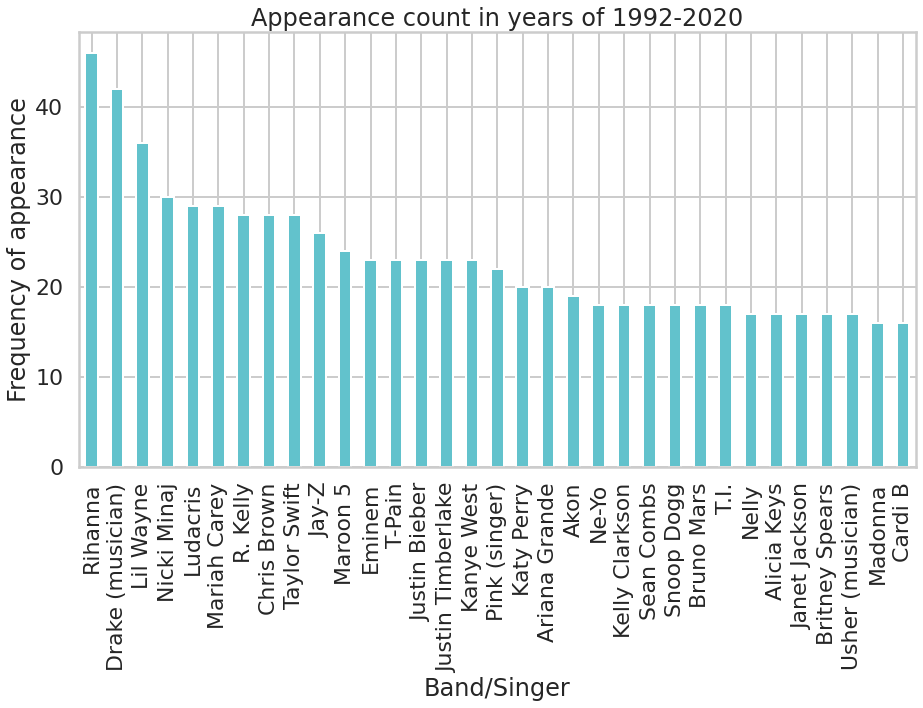

In [38]:
fig,ax=plt.subplots(figsize=(15,8))
top.plot(kind='bar',ax=ax,title='Appearance count in years of 1992-2020',color='#62C2CC',legend=None)
plt.ylabel("Frequency of appearance")
plt.xlabel("Band/Singer")

We'll create a metric to better access the quality of the artist by assigning ranks by grouping all of a singers songs together and assigning each song a score `101 - ranking`.

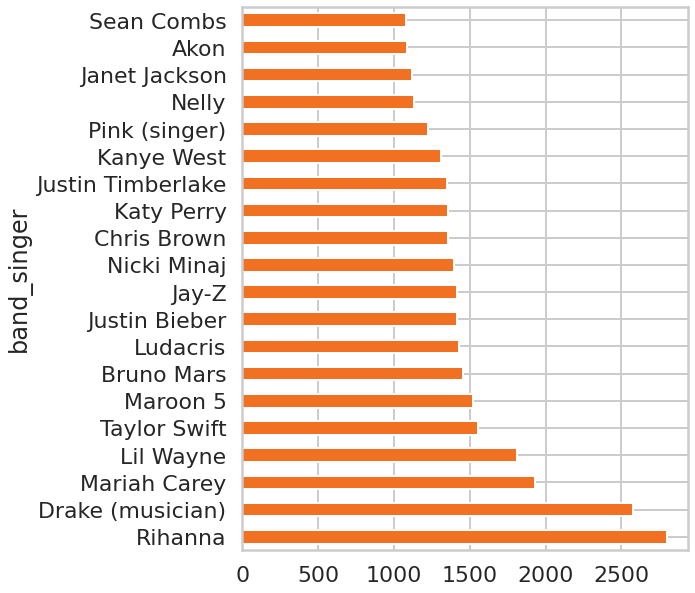

In [40]:
scores = flatframe.groupby('band_singer').apply(lambda v: np.sum(101 - v['ranking']))
scores=scores.sort_values(ascending=False)
scores[:20].plot(kind="barh",figsize=(8,10),color='#F17022')

It turns out Rihanna is more *prolific* by our definition, by quite a lot. So based on our analysis, the title of the best artist goes to Rihanna. 

## At what age do singers achieve their top ranking?

In [41]:
dfb=largedf[largedf.born!=False][['year','born','ranking','url']]
dfb['byear']=dfb.born.apply(lambda x: int(x.split('-')[0]))
byurl=dfb.groupby('url')

In [42]:
frames=[]
for k, v in byurl:
    minr=v.ranking.min()
    frames.append(v[v.ranking==minr])
topscoresdf=pd.concat(frames)
age=(topscoresdf.year-topscoresdf.byear)

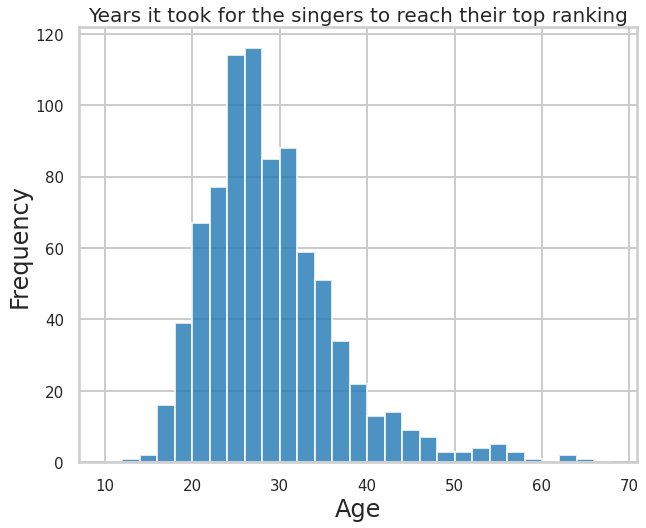

In [44]:
fig = plt.figure(figsize=(10,8))
age.hist(bins=np.arange(10,70,2),alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Years it took for the singers to reach their top ranking',fontsize=20)
plt.show()

##At what year since inception do bands reach their top rankings?

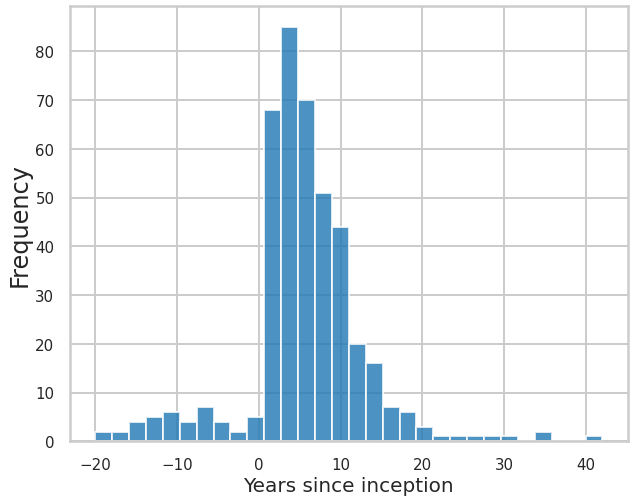

In [47]:
dfband=largedf[largedf.born.isna()]
dfband=dfband[dfband.ya.notna()]
dfband.drop(dfband.loc[dfband['ya']=='[]'].index, inplace=True)
dfband['start']=dfband.ya.apply(lambda x: int(x[:4]))
frames2=[]
fig = plt.figure(figsize=(10,8))
for k, v in dfband.groupby('url'):
    minr=v.ranking.min()
    frames2.append(v[v.ranking==minr])
tsdfg=pd.concat(frames2)
(tsdfg.year-tsdfg.start).hist(bins=30,alpha=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Years since inception',fontsize=20)
plt.ylabel('Frequency')
plt.show();

There are negative values because we took years active as "longest years" but they might have hit a the top 100 list before 

Maybe a better way to consider years active is finding the period in which they had the most hits

The *age of first fame* has an interesting shape, unimodal with a mode in the late 20s with a long tail to the right. This makes sense because there really is a lower age limit to artists but not so much an upper one. Also,  lot of singers reach the peak of their performance around their late twenties. It can be observed that the older singers have fewer hits which might be owing to their age.

Most bands achieve prominence under seven years of inception. Older bands don't appear to produce a lot of hits which might again be because of the artists' age or the fact that many bands don't stay together for more than 10-15 years. 


#Billboard Magazine: Year-end results from weekly results

The aim of this problem is to find features in the weekly Billboard top 100 that can predict the end year results. 

In the interests of time, we'll only do a study for 2020

## Scraping the Billboard Magazine (weekly and year-end top-100 singles) for 2020

In [66]:
# year-end page
end_year=requests.get("http://www.billboard.com/charts/year-end/2020/hot-100-songs").text

Before extracting data from the webpages, we need to first find all the Saturdays for a given year as Billboard releases its weekly ratings on Saturdays. Billboard makes the lists for every saturday available at [Billboard Hot 100](http://www.billboard.com/charts/hot-100/)

The function allsats(year, fs) gets all the saturdays in a given year, and given the day part of the date of the first saturday of the year in january.

In [67]:
from datetime import date, timedelta

def allsats(year, fs):
    days=[]
    d = date(year, 1, fs)       
    while d.year == year:
        days.append(d.strftime("%Y-%m-%d"))
        d += timedelta(days = 7)
    return days

For example, the first Saturday in 2020, Jan 4, would give:

In [68]:
sats=allsats(2020, 4)
print(sats[:10])
len(sats)

['2020-01-04', '2020-01-11', '2020-01-18', '2020-01-25', '2020-02-01', '2020-02-08', '2020-02-15', '2020-02-22', '2020-02-29', '2020-03-07']


52

In [70]:
# A dictionary of text from all requests, keyed in by date
satdict={}
satdict['end_year']=end_year
for sat in sats:
    satdict[sat]=requests.get("http://www.billboard.com/charts/hot-100/"+sat).text
    time.sleep(10)

In [71]:
with open("satdict.json","w") as fd:
    json.dump( satdict, fd)

## Parsing and Pre-processing

In [72]:
"""
Function
--------
get_weekly

Inputs
------
weekstring: the saturday in question
indict: a dictionary with keys being saturdays, and values being the billboard html associated
with those saturdays
   
Returns
-------
A list of tuples. Each tuple has two elements. The first element is the ranking. The
second is a dictionary songdict with keys-
    ranking: ranking of song. same as first element of the tuple
    title: title of song


Notes
-----
See description above.
"""
#your code here
def get_weekly(sat, indict):
    page_text=indict[sat]
    soup = BeautifulSoup(page_text, "html.parser")
    rows=soup.find_all("li",attrs={"class": "chart-list__element display--flex"})
    out=[]
    for r in rows:
      ranking=r.find('span',attrs={"class": "chart-element__rank__number"}).text
      title=r.find('span',attrs={"class":"chart-element__information__song"}).text
      songdict=dict(ranking=ranking, title=title)
      out.append((ranking, songdict))
    return out

In [73]:
"""
Function
--------
get_year

Inputs
------
weekstring: 'end_year'
indict: the value corresponding to 'end_year' in the dictionary satdict
   
Returns
-------
A list of tuples. Each tuple has two elements. The first element is the ranking. The
second is a dictionary songdict with keys-
    ranking: ranking of song. same as first element of the tuple
    title: title of song


Notes
-----
See description above.
"""
def get_year(sat, indict):
    page_text=indict[sat]
    soup = BeautifulSoup(page_text, "html.parser")
    rows=soup.find_all("div",attrs={"class": "ye-chart-item__primary-row"})
    out=[]
    for r in rows:
      ranking=r.find('div',attrs={"class": "ye-chart-item__rank"}).text.strip('\n')
      title=r.find('div',attrs={"class":"ye-chart-item__title"}).text.strip('\n').strip()
      songdict=dict(ranking=ranking, title=title)
      out.append((ranking, songdict))
    return out

In [74]:
weekinfo=[]
for k in sats:
    weekinfo.append(get_weekly(k, satdict))
weektuples=zip(sats, weekinfo) #week and that weeks 100 rankings

In [75]:
yearend=get_year('end_year', satdict)

In [76]:
def get_for_title(weektups):
    titles={}
    weekindex=1
    for weekdate, weeksrankings in weektups:
        for rankingtuple in weeksrankings:#iterate over the week's top-100
            ranking = rankingtuple[0]
            weekdict=rankingtuple[1]
            if weekdict['title'] not in titles.keys():
                titles[weekdict['title']]=[]
            titles[weekdict['title']].append((weekindex, ranking))
        weekindex=weekindex+1
    return titles

In [77]:
titles = get_for_title(weektuples)

In [78]:
tdict={}
for title in titles.keys():
    wtlist=titles[title] #ranking and week for that song
    weeks=[e[0] for e in wtlist]
    ranks=[int(e[1]) for e in wtlist]
    rankmean=np.mean(ranks)
    rankstd=np.std(ranks, ddof=1)#numpy standard deviation is population based, make it sample based
    ranklen=len(ranks)
    tdict[title.lower()]={'ranks':(rankmean, rankstd, ranklen)}

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Creating the dataframe

We'll try to explore how 'winners' (who are in the year-end results) are different from the rest with some more EDA

In [80]:
winners=[]
for yt in yearend:
    r,d =yt #d is the dictionary
    title=d['title'].lower()
    rvals=tdict[title]['ranks']
    winners.append(dict(title=title, winner=1, ranking=d['ranking'], rankmean=rvals[0], rankstd=rvals[1], weekson=rvals[2]))
winners[:5]

[{'ranking': '1',
  'rankmean': 9.173076923076923,
  'rankstd': 13.554134242097145,
  'title': 'blinding lights',
  'weekson': 52,
  'winner': 1},
 {'ranking': '2',
  'rankmean': 13.042553191489361,
  'rankstd': 14.549701097794163,
  'title': 'circles',
  'weekson': 47,
  'winner': 1},
 {'ranking': '3',
  'rankmean': 12.36111111111111,
  'rankstd': 15.626265028155599,
  'title': 'the box',
  'weekson': 36,
  'winner': 1},
 {'ranking': '4',
  'rankmean': 16.77777777777778,
  'rankstd': 12.480692158998105,
  'title': "don't start now",
  'weekson': 45,
  'winner': 1},
 {'ranking': '5',
  'rankmean': 9.257142857142858,
  'rankstd': 11.795669337771825,
  'title': 'rockstar',
  'weekson': 35,
  'winner': 1}]

In [81]:
winners2020=pd.DataFrame(winners)
winners2020.head()

,title,winner,ranking,rankmean,rankstd,weekson
0,blinding lights,1,1,9.173077,13.554134,52
1,circles,1,2,13.042553,14.549701,47
2,the box,1,3,12.361111,15.626265,36
3,don't start now,1,4,16.777778,12.480692,45
4,rockstar,1,5,9.257143,11.795669,35


###The mean rank against the final, year-end rank

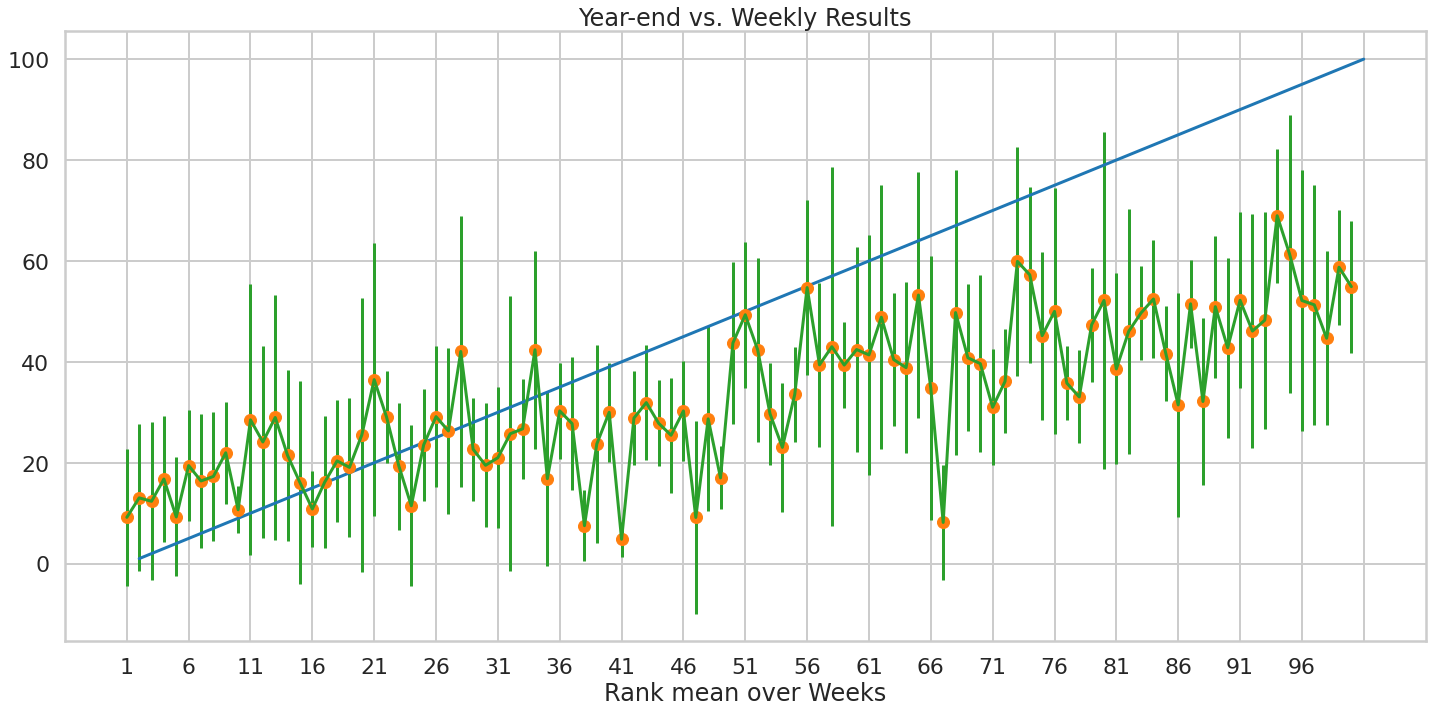

In [82]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot([1,100],[1,100])
ax.plot(winners2020.ranking, winners2020.rankmean, 'o')
ax.errorbar(winners2020.ranking, winners2020.rankmean, winners2020.rankstd)

start, stop = ax.get_xlim()
ticks = np.arange(start, stop, 5)
ax.set_xticks(ticks)
ax.grid(axis = 'both', linestyle='-')
ax.set_title("Year-end vs. Weekly Results")
plt.xlabel("Year-end ranks")
plt.xlabel("Rank mean over Weeks")
fig.tight_layout()

If data was on the 45 degree line (or tended to be around it), we would expect that our average rank measure would do a great job at predicting the final rank exactly. But notice that there is a linearly increasing trend, meaning that the average rank does seem to have some predictive power for the final rank. That one point whch has a low mean but the year-end ranking is around 67 is "All I want for Christmas is You" as it does well only in the final weeks of the year.



## Features that distinguish the top songs from the rest

In [83]:
winlist=[e['title'] for e in winners]
losers=[]
for title in tdict:
    if not title in winlist:
        rvals=tdict[title]['ranks']
        losers.append(dict(title=title, winner=0, ranking=-1, rankmean=rvals[0], rankstd=rvals[1], weekson=rvals[2]))

In [84]:
losers2020=pd.DataFrame(losers)
losers2020.head()

,title,winner,ranking,rankmean,rankstd,weekson
0,rockin' around the christmas tree,0,-1,35.222222,36.506088,9
1,jingle bell rock,0,-1,10.400000,11.738824,5
2,a holly jolly christmas,0,-1,12.000000,9.092121,4
3,it's the most wonderful time of the year,0,-1,13.800000,13.179530,5
4,last christmas,0,-1,19.800000,13.065221,5


In [85]:
all2020=pd.concat([winners2020, losers2020])
all2020.head()

,title,winner,ranking,rankmean,rankstd,weekson
0,blinding lights,1,1,9.173077,13.554134,52
1,circles,1,2,13.042553,14.549701,47
2,the box,1,3,12.361111,15.626265,36
3,don't start now,1,4,16.777778,12.480692,45
4,rockstar,1,5,9.257143,11.795669,35


In [87]:
all2020.dtypes

title        object
winner        int64
ranking      object
rankmean    float64
rankstd     float64
weekson       int64
dtype: object

In [88]:
all2020.ranking=all2020.ranking.astype(int)
all2020.dtypes

title        object
winner        int64
ranking       int64
rankmean    float64
rankstd     float64
weekson       int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


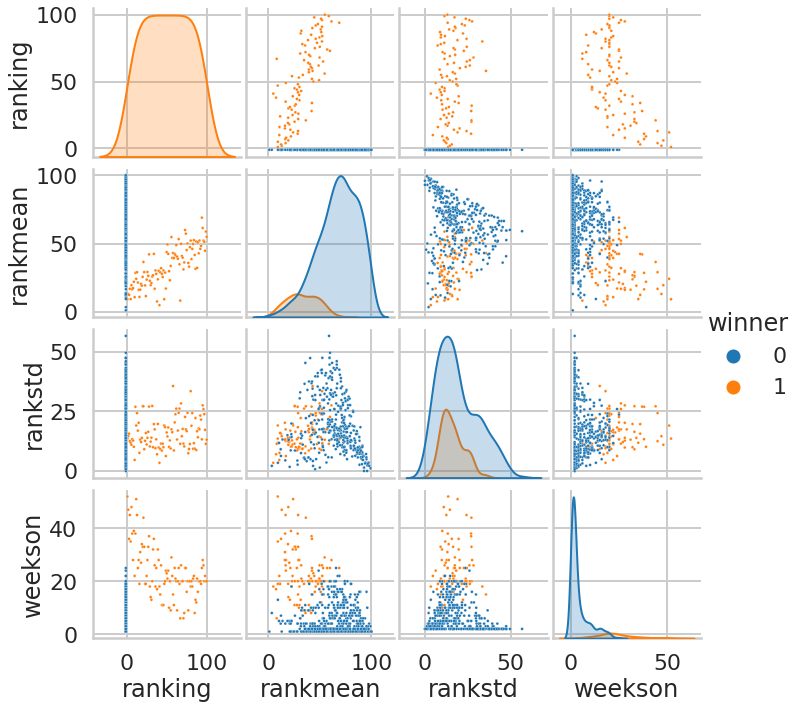

In [89]:
sns.pairplot(all2020, hue="winner", vars=[u'ranking', u'rankmean', u'rankstd', u'weekson'],plot_kws={"s": 8})

The ability of features to predict the final rank translates into the ability of predicting the winner.

The rankmean variable, has a very nice separation as shown by the two distinct humps on the histogram(and higher values for the losers in general). This same trend is also clear for weekson. But these two are very much expected based on our previous analysis. The real power starts to show when we consider the interaction of variables. For example the interaction of weekson and rankmean is interesting, as the clouds of points are nearly separated.

Future work would be to actually build models with this information by including in our data more years and trying to make predictions and observing how our predictions line up with reality. (Here, only 2020 is included for illustration.) 